In [3]:
import csv
import pandas as pd
        

In [8]:
IMDb = pd.read_csv('DataBases/title.basics.tsv', delimiter='\t').drop(columns = ['primaryTitle','titleType','isAdult'])
IMDb

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,originalTitle,startYear,endYear,runtimeMinutes,genres
0,tt0000001,Carmencita,1894,\N,1,"Documentary,Short"
1,tt0000002,Le clown et ses chiens,1892,\N,5,"Animation,Short"
2,tt0000003,Pauvre Pierrot,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,Un bon bock,1892,\N,12,"Animation,Short"
4,tt0000005,Blacksmith Scene,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...
7594493,tt9916848,Episode #3.17,2010,\N,\N,"Action,Drama,Family"
7594494,tt9916850,Episode #3.19,2010,\N,\N,"Action,Drama,Family"
7594495,tt9916852,Episode #3.20,2010,\N,\N,"Action,Drama,Family"
7594496,tt9916856,The Wind,2015,\N,27,Short


In [15]:
IMDb['originalTitle']=IMDb['originalTitle'].str.lower()

In [7]:
movies_ranking = pd.read_csv('DataBases/movies.csv', delimiter=',')
movies_ranking

,movie_name,rank,rank_date
0,The Dig,1,2021-02-11
1,The Little Things,2,2021-02-11
2,Palmer,3,2021-02-11
3,Finding 'Ohana,4,2021-02-11
4,Promising Young Woman,5,2021-02-11
...,...,...,...
695,Charlie's Angels,96,2020-07-03
696,Top Gun,97,2020-07-03
697,Inglourious Basterds,98,2020-07-03
698,Us,99,2020-07-03


In [13]:
movies_ranking['rank_date']= pd.to_datetime(movies_ranking['rank_date'])
movies_ranking['movie_name']= movies_ranking['movie_name'].str.lower()
movies_ranking

,movie_name,rank,rank_date
0,the dig,1,2021-02-11
1,the little things,2,2021-02-11
2,palmer,3,2021-02-11
3,finding 'ohana,4,2021-02-11
4,promising young woman,5,2021-02-11
...,...,...,...
695,charlie's angels,96,2020-07-03
696,top gun,97,2020-07-03
697,inglourious basterds,98,2020-07-03
698,us,99,2020-07-03


In [89]:
moviesDF = pd.merge(
    movies_ranking,
    IMDb,
    how="inner",
    left_on='movie_name',
    right_on='originalTitle',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
).drop(columns=['endYear','runtimeMinutes', 'originalTitle', 'tconst'])

In [90]:
moviesDF_genre = moviesDF.copy()
# Split the genres column using ','
moviesDF_genre['genres'] = moviesDF_genre['genres'].apply(lambda x: x.split(','))


In [91]:
moviesDF_genre

,movie_name,rank,rank_date,startYear,genres
0,12 hour shift,72,2020-10-13,2020,"[Comedy, Horror, Thriller]"
1,1776,79,2020-01-17,1972,"[Drama, Family, History]"
2,1776,79,2020-01-17,2020,[Drama]
3,1776,79,2020-01-17,1955,[Comedy]
4,1776,79,2020-01-17,2011,"[Comedy, Drama, Romance]"
...,...,...,...,...,...
14216,zodiac,69,2020-01-17,1966,"[Comedy, Drama, Music]"
14217,zodiac,69,2020-01-17,2017,[Comedy]
14218,zodiac,69,2020-01-17,2014,"[Comedy, Talk-Show]"
14219,zodiac,69,2020-01-17,2018,[Documentary]


In [92]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in moviesDF_genre['genres']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
#df_genre.genres

In [93]:
moviesDF_genre = pd.merge(moviesDF_genre.drop('genres', axis=1), genre, how='right', left_index=True, right_on='index').dropna(axis=0)
moviesDF_genre.tail(10)

,movie_name,rank,rank_date,startYear,index,genres
24868,zodiac,69,2020-01-17,2011,14215,News
24869,zodiac,69,2020-01-17,1966,14216,Comedy
24870,zodiac,69,2020-01-17,1966,14216,Drama
24871,zodiac,69,2020-01-17,1966,14216,Music
24872,zodiac,69,2020-01-17,2017,14217,Comedy
24873,zodiac,69,2020-01-17,2014,14218,Comedy
24874,zodiac,69,2020-01-17,2014,14218,Talk-Show
24875,zodiac,69,2020-01-17,2018,14219,Documentary
24876,zodiac,69,2020-01-17,2016,14220,Comedy
24877,zodiac,69,2020-01-17,2016,14220,Documentary


In [94]:
#remove duplicates
moviesDF_genre.drop_duplicates(subset= ['movie_name', 'rank', 'rank_date', 'startYear', 'genres'], inplace = True)

In [95]:
moviesDF_genre.describe()

,rank,index
count,18152.000000,18152.000000
mean,53.162406,7414.346078
std,32.377466,4166.265945
min,1.000000,0.000000
25%,28.000000,3564.750000
50%,55.000000,7627.000000
75%,80.000000,11085.250000
max,833.000000,14220.000000


In [96]:
moviesDF_genre['genres'].value_counts()

Comedy         2570
Drama          2420
Short          1706
Documentary    1039
Action          995
Talk-Show       934
Family          855
Adventure       788
Animation       764
Crime           684
Horror          668
Thriller        561
Fantasy         554
Sci-Fi          521
Romance         487
Mystery         483
Reality-TV      451
\N              364
Music           254
News            208
History         201
Biography       142
Adult           119
Musical         104
Game-Show       100
War              67
Sport            65
Western          44
Film-Noir         4
Name: genres, dtype: int64

In [98]:
#Some genres have the '\N' value, change to NaN
moviesDF_genre= moviesDF_genre[moviesDF_genre['genres'] != r'\N']
moviesDF_genre['genres'].value_counts()

Comedy         2570
Drama          2420
Short          1706
Documentary    1039
Action          995
Talk-Show       934
Family          855
Adventure       788
Animation       764
Crime           684
Horror          668
Thriller        561
Fantasy         554
Sci-Fi          521
Romance         487
Mystery         483
Reality-TV      451
Music           254
News            208
History         201
Biography       142
Adult           119
Musical         104
Game-Show       100
War              67
Sport            65
Western          44
Film-Noir         4
Name: genres, dtype: int64

In [99]:
import seaborn as sns

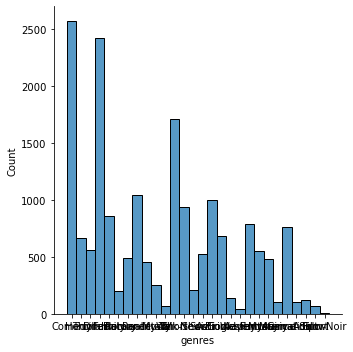

In [104]:
sns.displot(moviesDF_genre, x ='genres', label='Genres')